In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import svd,diagsvd

In [2]:
def plot_vectors(x,color=None):
    plt.axis('equal')
    plt.grid()
    plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

    if color is None:
        plt.quiver(np.zeros(len(x)),np.zeros(len(x)), x[:,0],x[:,1],scale=20)
    else:
        plt.quiver(np.zeros(len(x)),np.zeros(len(x)), x[:,0],x[:,1], color=color,scale=20)
    plt.show()    

# Vectors

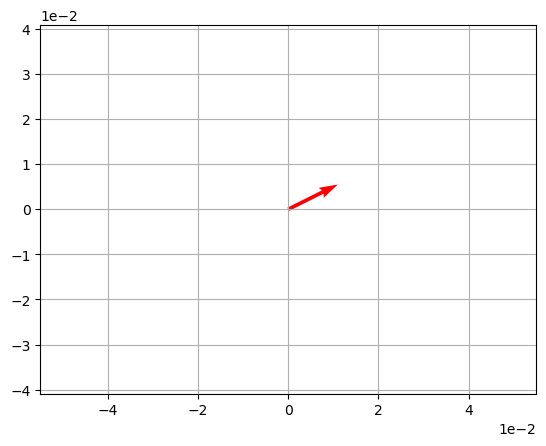

In [3]:
v=np.array([[2,1]])
plot_vectors(v,color='r')

# Calculating Magnitude / Norm of a Vector 

\begin{equation}\|\vec{v}\|_2 := \sqrt{v_{1}\;^{2} + v_{2}\;^{2}}\end{equation}. 

In [4]:
def norm(v):
    return np.sqrt(np.sum(v**2))
norm(v) == np.linalg.norm(v)

True

# Unit normalizing a  vector

\begin{equation} \vec{v}' := \frac{v}{\|\vec{v}\|_2}\end{equation}. 

In [5]:
def unit_norm(v):
    return v/norm(v)
# norm of a unit normalized vector is 1.
np.isclose(np.linalg.norm(v/np.linalg.norm(v)), 1.)

True

# Vector Addition

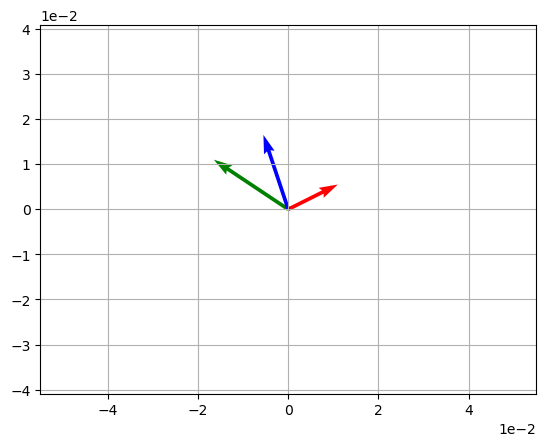

In [6]:
v = np.array([2,1])
s = np.array([-3,2])
vecs = np.array([v,s,v+s])
plot_vectors(vecs,color=['r','g','b'])

# Vector Multiplication
Vector multiplication can be performed in three ways:

- Scalar Multiplication, 
- Elementwise Vector Multiplication, a.k.a. Hadamard Product
- Dot Product Multiplication
- Cross Product Multiplication

# Scalar Multiplication

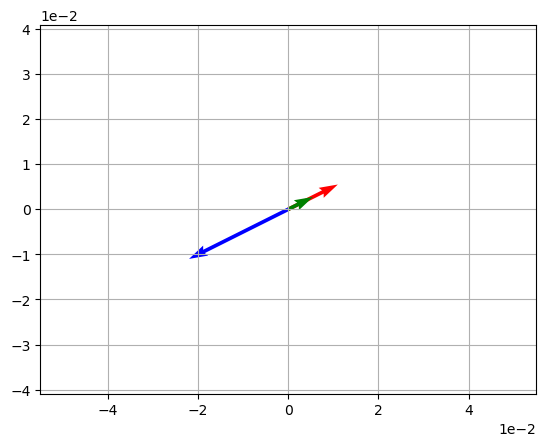

In [7]:
vecs = np.array([v, v*.5, -v*2])

plot_vectors(vecs,color=['r','g','b'])

# Elementwise Vector Multiplication

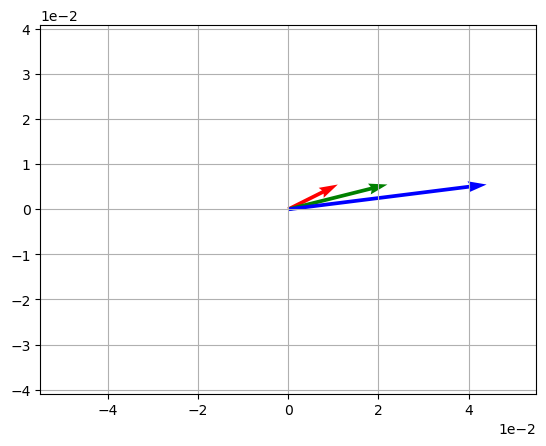

In [8]:
vecs = np.array([v, v*v, v*v*v])
plot_vectors(vecs,color=['r','g','b'])

## Dot Product Multiplication


+ a *scalar product* =>  the *dot product*
+ *vector product* (a vector).

Scalar product is denoted with the &bull; operator:

\begin{equation} \vec{v} \cdot \vec{s} = (v_{1} \cdot s_{1}) + (v_{2} \cdot s_{2}) ... + \; (v_{n} \cdot s_{n})\end{equation}


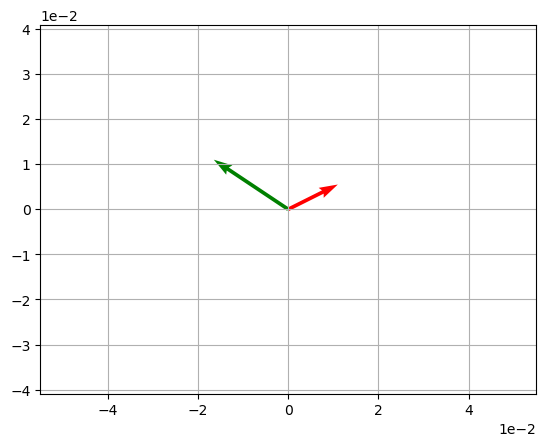

V:[2 1] 	 S:[-3  2], 	 the dot product:-4


In [9]:
vecs = np.array([v, s])
plot_vectors(vecs,color=['r','g'])
print(f'V:{v} \t S:{s}, \t the dot product:{v@s}')

In [10]:
print(f'V:{v} \t V:{v}, \t the dot product:{v@v}')

V:[2 1] 	 V:[2 1], 	 the dot product:5


# Dot product of a unit normalized vector with itself is equal 1

In [11]:
print(f'Unit V:{unit_norm(v)} \t Unit V:{unit_norm(v)}, \t the dot product:{np.dot(unit_norm(v),unit_norm(v))}')

Unit V:[0.89442719 0.4472136 ] 	 Unit V:[0.89442719 0.4472136 ], 	 the dot product:0.9999999999999999


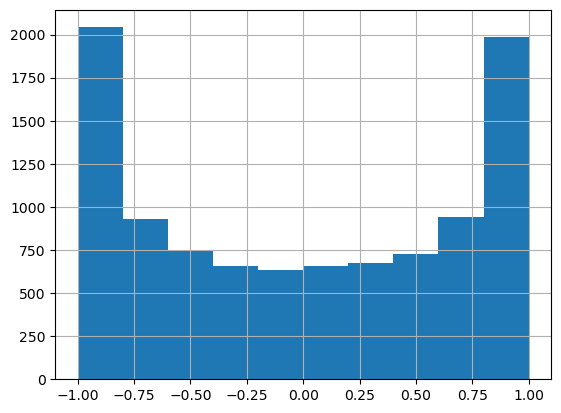

In [39]:
# Return a sample from the “standard normal” distribution.
dot_products= [np.dot(unit_norm(np.random.randn(2)),unit_norm(np.random.randn(2))) for _ in range(10_000)]
n, bins, patches = plt.hist(dot_products)
plt.grid(True)
plt.show()
del dot_products

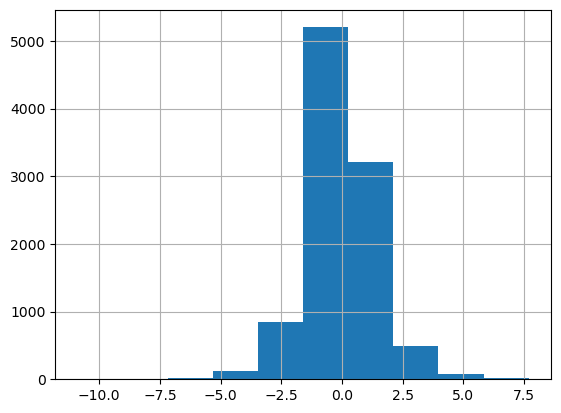

In [40]:
# Return a sample from the “standard normal” distribution.
dot_products= [np.dot(np.random.randn(2),np.random.randn(2)) for _ in range(10_000)]
n, bins, patches = plt.hist(dot_products)
plt.grid(True)
plt.show()
del dot_products

# The Cosine Rule

$$ \vec{v} \cdot \vec{s} = \|\vec{v} \|\|\vec{s}\| \cos (\theta) ,$$ where 

$$ \cos(\theta) = \frac{\vec{v} \cdot \vec{s}}{\|\vec{v} \|\|\vec{s}\|} $$



In [98]:
import math
# In degrees
math.degrees(math.acos(np.dot(v,s)/(norm(v)*norm(s))))

119.74488129694222

In [99]:
# Question what is the degree betwen two same vectors, "thiny, very close to zero"
.0000001<math.degrees(math.acos(np.dot(v,v)/(norm(v)*norm(v))))<.00001

True

# Dot Product Matrix Multiplication


In [65]:
A = np.array([[1,2,3],
              [4,5,6]])
B = np.array([[9,8],
              [7,6],
              [5,4]])

print(A.shape)
print(B.shape)
A @ B

(2, 3)
(3, 2)


array([[ 38,  32],
       [101,  86]])

# Inverse of a Matrix
For matrix division, we use a related idea; we multiply by the *inverse* of a matrix:

\begin{equation}A \div B = A \cdot B^{-1}\end{equation}

The inverse of B is B<sup>-1</sup> as long as the following equation is true:

\begin{equation}B \cdot B^{-1} = B^{-1} \cdot B = I\end{equation}

**I**, you may recall, is an *identity* matrix; the matrix equivalent of 1.

So how do you calculate the inverse of a matrix? For a 2x2 matrix, you can follow this formula:

\begin{equation}\begin{bmatrix}a & b\\c & d\end{bmatrix}^{-1} = \frac{1}{ad-bc}  \begin{bmatrix}d & -b\\-c & a\end{bmatrix}\end{equation}

What happened there?
- We swapped the positions of *a* and *d*
- We changed the signs of *b* and *c*
- We multiplied the resulting matrix by 1 over the *determinant* of the matrix (*ad-bc*)

In [66]:
A=(np.arange(4)+1).reshape(2,2)

print(f'A:\n{A}',end='\n')
print(f'A^-1:\n{np.linalg.inv(A)}',end='\n')

A:
[[1 2]
 [3 4]]
A^-1:
[[-2.   1. ]
 [ 1.5 -0.5]]


In [67]:
def compute_inv(X):
    X_inverse=np.zeros(X.shape)
    a,b,c,d=X.flatten()
    scalar=1/((a*d) - (b*c))

    return scalar*np.array([[d,-b],
                       [-c,a]])

In [68]:
compute_inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

## Example: Solving Systems of Equations with Matrices
One of the great things about matrices, is that they can help us solve systems of equations. For example, consider the following system of equations:

\begin{equation}2x + 4y = 18\end{equation}
\begin{equation}6x + 2y = 34\end{equation}

We can write this in matrix form, like this:

\begin{equation}\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix} \cdot \begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

Note that the variables (***x*** and ***y***) are  arranged as a column in one matrix, which is multiplied by a matrix containing the coefficients to produce as matrix containing the results. If you calculate the dot product on the left side, you can see clearly that this represents the original equations:

\begin{equation}\begin{bmatrix}2x + 4y\\6x + 2y\end{bmatrix} =\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

Now. let's name our matrices so we can better understand what comes next:

\begin{equation}A=\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix}\;\;\;\;X=\begin{bmatrix}x\\y\end{bmatrix}\;\;\;\;B=\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

# Why inverse of a matrix is important ?

We already know that 

$$ A \cdot X = B $$
means that

$$ X = A^{-1} \cdot B$$


So, first we need the inverse of A:

\begin{equation}\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix}^{-1} = \frac{1}{(2\times2)-(4\times6)}  \begin{bmatrix}2 & -4\\-6 & 2\end{bmatrix}\end{equation}

\begin{equation}= \frac{1}{-20}  \begin{bmatrix}2 & -4\\-6 & 2\end{bmatrix}\end{equation}

\begin{equation}A^{-1}=\begin{bmatrix}-0.1 & 0.2\\0.3 & -0.1\end{bmatrix}\end{equation}


Then we just multiply this with B:

\begin{equation}X = \begin{bmatrix}-0.1 & 0.2\\0.3 & -0.1\end{bmatrix} \cdot \begin{bmatrix}18\\34\end{bmatrix}\end{equation}

\begin{equation}X = \begin{bmatrix}(-0.1 \times 18)+(0.2 \times 34)\\(0.3\times18)+(-0.1\times34)\end{bmatrix}\end{equation}

\begin{equation}X = \begin{bmatrix}5\\2\end{bmatrix}\end{equation}


In [69]:
A=np.array([[2,4],[6,2]])
B=np.array([[18],[34]])

A_inv=compute_inv(A)
A_inv @ B

array([[5.],
       [2.]])

# Covariance Matrix
$$
{\bf X} = \left[ \begin{array}{ccc} 
4.0 & 2.0 & 0.60 \\
4.2 & 2.1 & 0.59 \\
3.9 & 2.0 & 0.58 \\
4.3 & 2.1 & 0.62 \\
4.1 & 2.2 & 0.63   
\end{array} \right]
$$


$$ \mbox{COV} = \frac{\sum_{i=1}^n (X_i - \bar{x})(Y_i - \bar{y})}{n-1} \,$$

# Transformations, Eigenvectors, and Eigenvalues


## Linear Transformations
In Matrix vector multiplications, matrices act as functions that operate on an input vector to produce a vector output. Hence, matrix multiplications of vectors are *linear transformations* that transform the input vector into the output vector.

For example, consider this matrix ***A*** and vector ***v***:

$$ A = \begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

We can define a transformation ***T*** like this:

$$ T(\vec{v}) = A\vec{v},$$

where

$$ T: \rm I\!R^{2} \to \rm I\!R^{2} $$



In [70]:
A=np.array([[2,3],[5,2]])
v=np.array([1,2])

A.shape,v.shape

((2, 2), (2,))

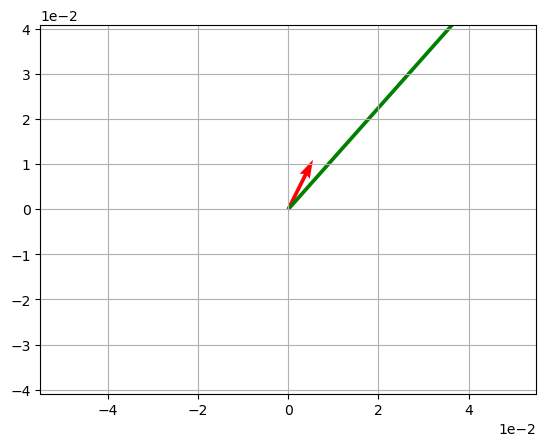

In [71]:
Av=A@v
plot_vectors(np.array([v,Av]),color=['r','g'])

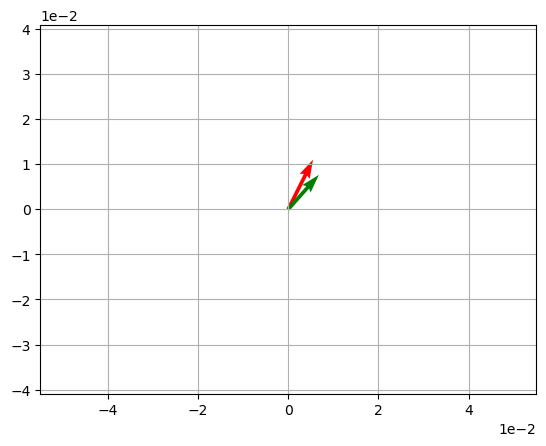

In [73]:


normalized_A=unit_norm(A)
plot_vectors(np.array([v,normalized_A@v]),color=['r','g'])

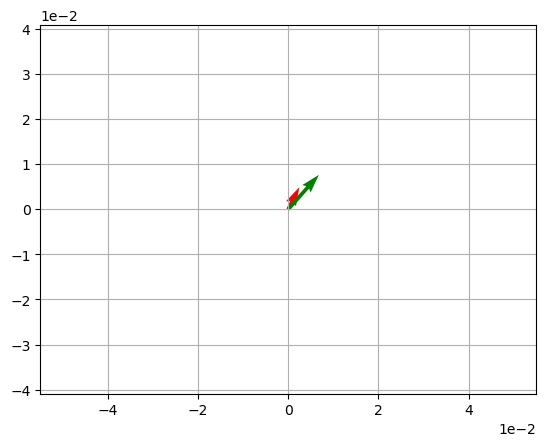

In [74]:

normalized_v=unit_norm(v)

plot_vectors(np.array([normalized_v,normalized_A@v]),color=['r','g'])

## Transformations of Magnitude and Direction

When you multiply a vector by a matrix, you transform it in at least one of the following two ways:
* Scale the length (*magnitude*) of the matrix to make it longer or shorter
* Change the direction (*amplitude*) of the matrix

For example consider the following matrix and vector:

$$ A = \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\0\end{bmatrix}$$

As before, we transform the vector ***v*** by multiplying it with the matrix ***A***:

\begin{equation}\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}\end{equation}

In this case, the resulting vector has changed in length (*magnitude*), but has not changed its direction (*amplitude*).

Let's visualize that in Python:

[2 0]


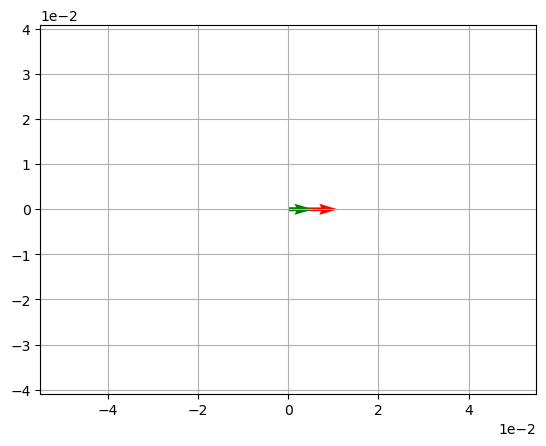

In [75]:

v = np.array([1,0])
A = np.array([[2,0],
              [0,2]])

t = A@v
print (t)

# Plot v and t
vecs = np.array([t,v])

plot_vectors(vecs,color=['r','g'])


[0 1]


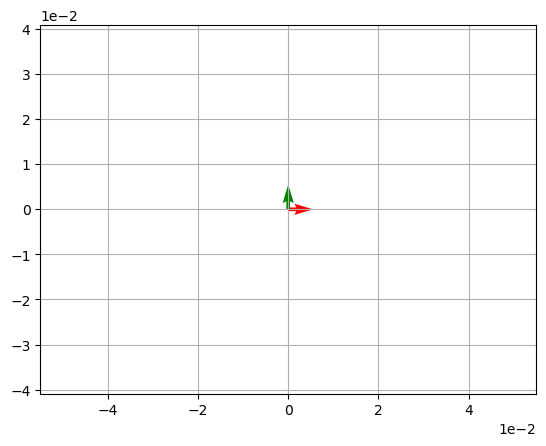

In [76]:
v = np.array([1,0])
A = np.array([[0,-1],
              [1,0]])

t = A@v
print (t)

# Plot v and t
vecs = np.array([v,t])
plot_vectors(vecs,color=['r','g'])


[2 1]


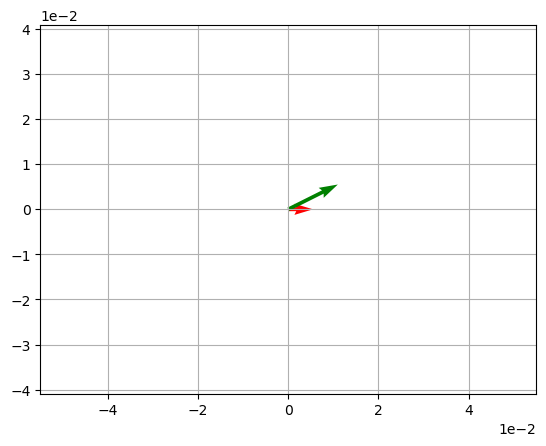

In [77]:
v = np.array([1,0])
A = np.array([[2,1],
              [1,2]])

t = A@v
print (t)

# Plot v and t
vecs = np.array([v,t])
plot_vectors(vecs,color=['r','g'])


### Afine Transformations
An Afine transformation multiplies a vector by a matrix and adds an offset vector, sometimes referred to as *bias*; like this:

$$T(\vec{v}) = A\vec{v} + \vec{b}$$

For example:

\begin{equation}\begin{bmatrix}5 & 2\\3 & 1\end{bmatrix} \cdot  \begin{bmatrix}1\\1\end{bmatrix} + \begin{bmatrix}-2\\-6\end{bmatrix} = \begin{bmatrix}5\\-2\end{bmatrix}\end{equation}

This kind of transformation is actually the basis of linear regression, which is a core foundation for machine learning. The matrix defines the *features*, the first vector is the *coefficients*, and the bias vector is the *intercept*.

here's an example of an Afine transformation in Python:

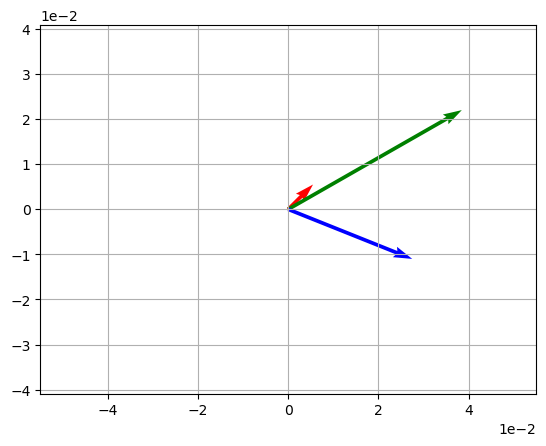

In [78]:
v = np.array([1,1])
A = np.array([[5,2],
              [3,1]])
b = np.array([-2,-6])

vecs = np.array([v,A@v, A@v + b])
plot_vectors(vecs,color=['r','g','b'])

## Eigenvectors and Eigenvalues
So we can see that when you transform a vector using a matrix, we change its direction, length, or both. When the transformation only affects scale (in other words, the output vector has a different magnitude but the same amplitude as the input vector), the matrix multiplication for the transformation is the equivalent operation as some scalar multiplication of the vector.

For example, earlier we examined the following transformation that dot-mulitplies a vector by a matrix:

$$\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

You can achieve the same result by mulitplying the vector by the scalar value ***2***:

$$2 \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

The following python performs both of these calculation and shows the results, which are identical.

[2 0]
[2 0]


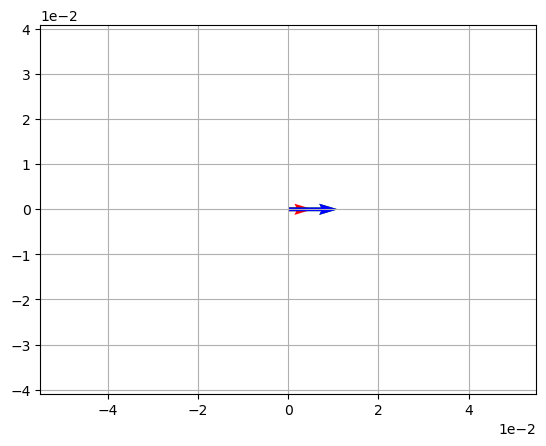

In [79]:
v = np.array([1,0])
A = np.array([[2,0],
              [0,2]])

t1 = A@v
print (t1)


t2 = 2*v
print (t2)

plot_vectors(np.array([v,t1,t2]),color=['r','g','b'])


In cases like these, where a matrix transformation is the equivelent of a scalar-vector multiplication, the scalar-vector pairs that correspond to the matrix are known respectively as eigenvalues and eigenvectors. We generally indicate eigenvalues using the Greek letter lambda (&lambda;), and the formula that defines eigenvalues and eigenvectors with respect to a transformation is:

$$ T(\vec{v}) = \lambda\vec{v}$$

Where the vector ***v*** is an eigenvector and the value ***&lambda;*** is an eigenvalue for transformation ***T***.

When the transformation ***T*** is represented as a matrix multiplication, as in this case where the transformation is represented by matrix ***A***:

$$ T(\vec{v}) = A\vec{v} = \lambda\vec{v}$$

Then  ***v*** is an eigenvector and ***&lambda;*** is an eigenvalue of ***A***.

A matrix can have multiple eigenvector-eigenvalue pairs, and you can calculate them manually. However, it's generally easier to use a tool or programming language. For example, in Python you can use the ***linalg.eig*** function, which returns an array of eigenvalues and a matrix of the corresponding eigenvectors for the specified matrix.

Here's an example that returns the eigenvalue and eigenvector pairs for the following matrix:

$$A=\begin{bmatrix}2 & 0\\0 & 3\end{bmatrix}$$

In [80]:
A = np.array([[2,0],
              [0,3]])
eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

[2. 3.]
[[1. 0.]
 [0. 1.]]


So there are two eigenvalue-eigenvector pairs for this matrix, as shown here:

$$ \lambda_{1} = 2, \vec{v_{1}} = \begin{bmatrix}1 \\ 0\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 3, \vec{v_{2}} = \begin{bmatrix}0 \\ 1\end{bmatrix} $$

Let's verify that multiplying each eigenvalue-eigenvector pair corresponds to the dot-product of the eigenvector and the matrix. Here's the first pair:

$$ 2 \times \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 3\end{bmatrix} \cdot \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix} $$

So far so good. Now let's check the second pair:

$$ 3 \times \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 3\end{bmatrix} \cdot \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix} $$

So our eigenvalue-eigenvector scalar multiplications do indeed correspond to our matrix-eigenvector dot-product transformations.

Here's the equivalent code in Python, using the ***eVals*** and ***eVecs*** variables you generated in the previous code cell:

In [81]:
vec1 = eVecs[:,0]
lam1 = eVals[0]

print('Matrix A:')
print(A)
print('-------')

print('lam1: ' + str(lam1))
print ('v1: ' + str(vec1))
print ('Av1: ' + str(A@vec1))
print ('lam1 x v1: ' + str(lam1*vec1))

print('-------')

vec2 = eVecs[:,1]
lam2 = eVals[1]

print('lam2: ' + str(lam2))
print ('v2: ' + str(vec2))
print ('Av2: ' + str(A@vec2))
print ('lam2 x v2: ' + str(lam2*vec2))

Matrix A:
[[2 0]
 [0 3]]
-------
lam1: 2.0
v1: [1. 0.]
Av1: [2. 0.]
lam1 x v1: [2. 0.]
-------
lam2: 3.0
v2: [0. 1.]
Av2: [0. 3.]
lam2 x v2: [0. 3.]


Similarly, earlier we examined the following matrix transformation:

$$\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

And we saw that you can achieve the same result by mulitplying the vector by the scalar value ***2***:

$$2 \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

This works because the scalar value 2 and the vector (1,0) are an eigenvalue-eigenvector pair for this matrix.

Let's use Python to determine the eigenvalue-eigenvector pairs for this matrix:

In [82]:
A = np.array([[2,0],
              [0,2]])
eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

[2. 2.]
[[1. 0.]
 [0. 1.]]


So once again, there are two eigenvalue-eigenvector pairs for this matrix, as shown here:

$$ \lambda_{1} = 2, \vec{v_{1}} = \begin{bmatrix}1 \\ 0\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 2, \vec{v_{2}} = \begin{bmatrix}0 \\ 1\end{bmatrix} $$

Let's verify that multiplying each eigenvalue-eigenvector pair corresponds to the dot-product of the eigenvector and the matrix. Here's the first pair:

$$ 2 \times \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix} $$

Well, we already knew that. Now let's check the second pair:

$$ 2 \times \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 2\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 2\end{bmatrix} $$

Now let's use Pythonto verify and plot these transformations:

In [83]:
vec1 = eVecs[:,0]
lam1 = eVals[0]

print('Matrix A:')
print(A)
print('-------')

print('lam1: ' + str(lam1))
print ('v1: ' + str(vec1))
print ('Av1: ' + str(A@vec1))
print ('lam1 x v1: ' + str(lam1*vec1))

print('-------')

vec2 = eVecs[:,1]
lam2 = eVals[1]

print('lam2: ' + str(lam2))
print ('v2: ' + str(vec2))
print ('Av2: ' + str(A@vec2))
print ('lam2 x v2: ' + str(lam2*vec2))


Matrix A:
[[2 0]
 [0 2]]
-------
lam1: 2.0
v1: [1. 0.]
Av1: [2. 0.]
lam1 x v1: [2. 0.]
-------
lam2: 2.0
v2: [0. 1.]
Av2: [0. 2.]
lam2 x v2: [0. 2.]


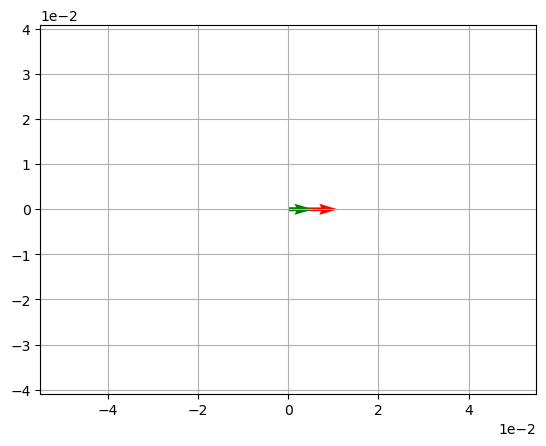

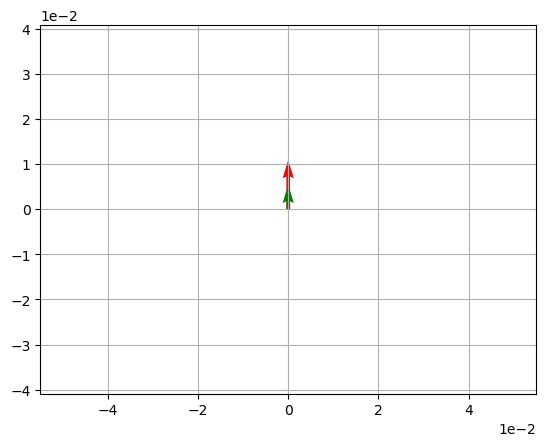

In [84]:
# Plot the resulting vectors
t1 = lam1*vec1
t2 = lam2*vec2
vecs = np.array([t1,vec1])
plot_vectors(vecs,color=['r','g'])

vecs = np.array([t2,vec2])
plot_vectors(vecs,color=['r','g'])


In [85]:
A = np.array([[2,1],
              [1,2]])

eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


This time the eigenvalue-eigenvector pairs are:

$$ \lambda_{1} = 3, \vec{v_{1}} = \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 1, \vec{v_{2}} = \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} $$

So let's check the first pair:

$$ 3 \times \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}2.12132034 \\ 2.12132034\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 1\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}2.12132034 \\ 2.12132034\end{bmatrix} $$

Now let's check the second pair:

$$ 1 \times \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}-0.70710678\\0.70710678\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 1\\1 & 2\end{bmatrix} \cdot \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}-0.70710678\\0.70710678\end{bmatrix} $$

With more complex examples like this, it's generally easier to do it with Python:

Matrix A:
[[2 1]
 [1 2]]
-------
lam1: 3.0
v1: [0.70710678 0.70710678]
Av1: [2.12132034 2.12132034]
lam1 x v1: [2.12132034 2.12132034]
-------
lam2: 1.0
v2: [-0.70710678  0.70710678]
Av2: [-0.70710678  0.70710678]
lam2 x v2: [-0.70710678  0.70710678]


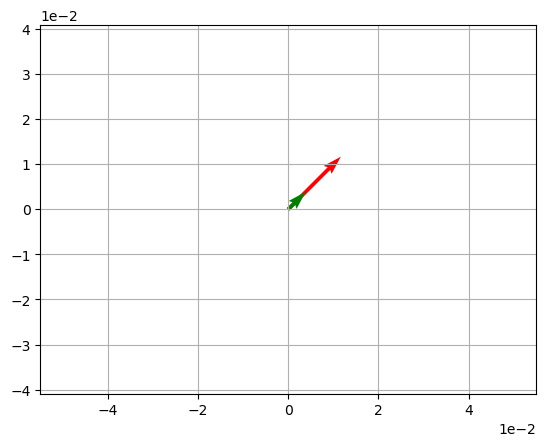

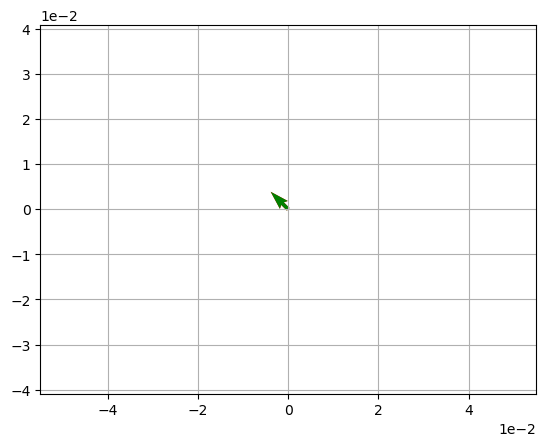

In [86]:
vec1 = eVecs[:,0]
lam1 = eVals[0]

print('Matrix A:')
print(A)
print('-------')

print('lam1: ' + str(lam1))
print ('v1: ' + str(vec1))
print ('Av1: ' + str(A@vec1))
print ('lam1 x v1: ' + str(lam1*vec1))

print('-------')

vec2 = eVecs[:,1]
lam2 = eVals[1]

print('lam2: ' + str(lam2))
print ('v2: ' + str(vec2))
print ('Av2: ' + str(A@vec2))
print ('lam2 x v2: ' + str(lam2*vec2))


# Plot the results
t1 = lam1*vec1
t2 = lam2*vec2

fig = plt.figure()
a=fig.add_subplot(1,1,1)
# Plot v and t1
vecs = np.array([t1,vec1])
plot_vectors(vecs,color=['r','g'])

vecs = np.array([t2,vec2])
plot_vectors(vecs,color=['r','g'])

# 4. Eigendecomposition



We can decompose a matrix using the following formula:

$$A = Q \Lambda Q^{-1}$$

+ where ***A*** is a trasformation that can be applied to a vector in its current base, 
+ ***Q*** is a matrix of eigenvectors that defines a change of basis, and 
+ ***&Lambda;*** is a matrix with eigenvalues on the diagonal that defines the same linear transformation as ***A*** in the base defined by ***Q***.


$$A=\begin{bmatrix}3 & 2\\1 & 0\end{bmatrix}$$

In [87]:
A = np.array([[3,2],
              [1,0]])
l, Q = np.linalg.eig(A)
print(Q)

[[ 0.96276969 -0.48963374]
 [ 0.27032301  0.87192821]]


So for matrix ***A***, ***Q*** is the following matrix:

$$Q=\begin{bmatrix}0.96276969 & -0.48963374\\0.27032301 & 0.87192821\end{bmatrix}$$

***&Lambda;*** is a matrix that contains the eigenvalues for ***A*** on the diagonal, with zeros in all other elements; so for a 2x2 matrix, &Lambda; will look like this:

$$\Lambda=\begin{bmatrix}\lambda_{1} & 0\\0 & \lambda_{2}\end{bmatrix}$$


In [88]:
L = np.diag(l)
print (L)

[[ 3.56155281  0.        ]
 [ 0.         -0.56155281]]


So ***&Lambda;*** is the following matrix:

$$\Lambda=\begin{bmatrix}3.56155281 & 0\\0 & -0.56155281\end{bmatrix}$$

Now we just need to find ***Q<sup>-1</sup>***, which is the inverse of ***Q***:

In [89]:
Qinv = np.linalg.inv(Q)
print(Qinv)

[[ 0.89720673  0.50382896]
 [-0.27816009  0.99068183]]


The inverse of ***Q*** then, is:

$$Q^{-1}=\begin{bmatrix}0.89720673 & 0.50382896\\-0.27816009 & 0.99068183\end{bmatrix}$$

So what does that mean? Well, it means that we can decompose the transformation of *any* vector multiplied by matrix ***A*** into the separate operations ***Q&Lambda;Q<sup>-1</sup>***:

$$A\vec{v} = Q \Lambda Q^{-1}\vec{v}$$

To prove this, let's take vector ***v***:

$$\vec{v} = \begin{bmatrix}1\\3\end{bmatrix} $$

Our matrix transformation using ***A*** is:

$$\begin{bmatrix}3 & 2\\1 & 0\end{bmatrix} \cdot \begin{bmatrix}1\\3\end{bmatrix} $$

So let's show the results of that using Python:

[9 1]


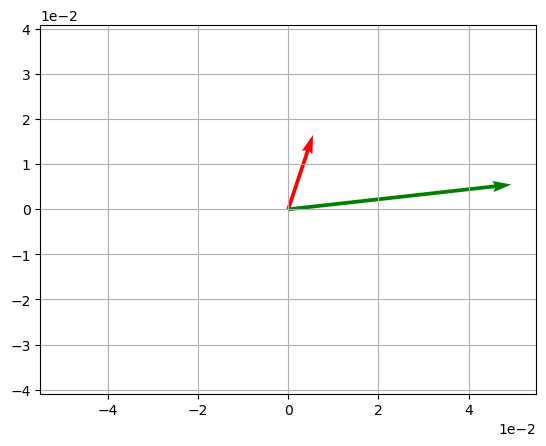

In [90]:
v = np.array([1,3])
t = A@v

print(t)

# Plot v and t
vecs = np.array([v,t])
plot_vectors(vecs,color=['r','g'])


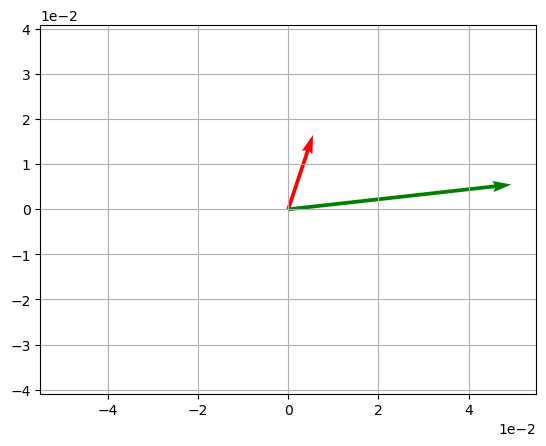

In [91]:


t = (Q@(L@(Qinv)))@v

# Plot v and t
vecs = np.array([v,t])
plot_vectors(vecs,color=['r','g'])

So ***A*** and ***Q&Lambda;Q<sup>-1</sup>*** are equivalent.

If we view the intermediary stages of the decomposed transformation, you can see the transformation using ***A*** in the original base for ***v*** (orange to blue) and the transformation using ***&Lambda;*** in the change of basis decribed by ***Q*** (red to magenta):

# 3. Fundamental Algebraich Operations and Einsum

This tutorial is based on [EINSUM IS ALL YOU NEED](https://rockt.github.io/2018/04/30/einsum) and surves as a algebra refresher